# Getting Started with QuantumState

In Quantum mechanics:
```{note}
Every isolated physical system has associated with it a complex inner product space or Hilbert Space. This is known as its state space. A complete description of the system is given by its state vector, |ψ>, a unit-normalised vector in the state space.
```

In quantum computing, we have finite dimentional quantum states that act in a Hilbert Space of dimension $2^{n}\times 2^{n}$ for $n$ qubits. In the computational (Pauli $Z$ basis) we write such states as:

$$ |\psi \rangle = \sum_{i=0}^{2^{n}-1} = c_{i}|i \rangle$$
 
where:
- The $c_{i}$ terms represent complex coefficients.
- The state must be normalized, i.e. $ \sum_{i=0}^{2^{n}-1} |c_{i}|^{2} = 1$
- $|i \rangle$ represent binary bitstrings aka: $i \in \{0,1\}^{\otimes n}$

The `QuantumState` class is used to describe such states and provide access to useful ways to manipulate such states. 

```{note}
The normalization conidition is relaxed for greater utility.
```

## Initialization

In [1]:
from symmer import QuantumState

/Users/lex/anaconda3/envs/symmer_github/lib/python3.9/site-packages/cotengra/hyperoptimizers/hyper.py:34: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


The following ways can be used to initalize a quantum state:
1. `QuantumState.from_array`
2. `QuantumState.from_dictionary`
3. `QuantumState.random`
4. `QuantumState.haar_random`
5. `QuantumState.zero`

The `from_array` method take in a vector of size $2^{n}\times 1$ to define a ket and $1 \times 2^{n}$ to define a bra

In [2]:
import numpy as np

normalized_vec_ket = np.array([[0.18257419],
                           [0.36514837],
                           [0.54772256],
                           [0.73029674]])

psi_ket = QuantumState.from_array(normalized_vec_ket)
psi_ket

 0.183+0.000j |00> +
 0.365+0.000j |01> +
 0.548+0.000j |10> +
 0.730+0.000j |11>

In [3]:
normalized_vec_bra = np.array([[0.18257419, 0.36514837, 0.54772256, 0.73029674]])

psi_bra = QuantumState.from_array(normalized_vec_bra)
psi_bra

 0.183+0.000j <00| +
 0.365+0.000j <01| +
 0.548+0.000j <10| +
 0.730+0.000j <11|

Note we can also build a state that is  **NOT normalized**:

In [4]:
import numpy as np

ket_unormalized = np.array([[1],
                           [2],
                           [3],
                           [4]])

psi_ket = QuantumState.from_array(ket_unormalized)
psi_ket

/Users/lex/anaconda3/envs/symmer_github/lib/python3.9/site-packages/symmer/operators/base.py:2184: UserWarning: statevector is not normalized
  warnings.warn(f'statevector is not normalized')


 1.000+0.000j |00> +
 2.000+0.000j |01> +
 3.000+0.000j |10> +
 4.000+0.000j |11>

This will throw up an error. We can also check the state is normalized via the `_is_normalized` method:

In [5]:
psi_ket._is_normalized()

False

We can re-normalize a state by running `normalize` that returns a new `QuantumState` that has been normalized

In [6]:
psi_renormalized = psi_ket.normalize

print('now normalized:', psi_renormalized._is_normalized())
psi_renormalized

now normalized: True


 0.183+0.000j |00> +
 0.365+0.000j |01> +
 0.548+0.000j |10> +
 0.730+0.000j |11>

which does the following:

$$|\psi_{norm} \rangle = \frac{|\psi \rangle}{\sum_{i=0}^{2^{n}-1} |c_{i}|^{2}} = \frac{\sum_{i=0}^{2^{n}-1} c_{i}|i \rangle}{\sum_{i=0}^{2^{n}-1} |c_{i}|^{2}} $$

The `from_dictionary` method take in a dictioinary of binary keys and coefficient values:

In [7]:
input_dict = {'00': (0.18257419+0j),
             '01': (0.36514837+0j),
             '10': (0.54772256+0j),
             '11': (0.73029674+0j)}


psi_from_dict = QuantumState.from_dictionary(input_dict)
psi_from_dict

 0.183+0.000j |00> +
 0.365+0.000j |01> +
 0.548+0.000j |10> +
 0.730+0.000j |11>

Note this method does NOT allow bras to be defined.

The `from_dictionary` also allows a user to define unormalized quantum states. Let us consider a dictionary the represents the bitstrings obtained by measuring a quantum state in the computaitonal basis.

Here:
- $|00 \rangle$ was obtained $200$ times
- $|01 \rangle$ was obtained $58$ times
- $|10 \rangle$ was obtained $42$ times
- $|11 \rangle$ was obtained $200$ times

In [9]:
count_dicts = {'00': 200,
             '01': 58,
             '10': 42,
             '11': 100}


psi_from_counts = QuantumState.from_dictionary(count_dicts)
psi_from_counts

 200.000+0.000j |00> +
 58.000+0.000j |01> +
 42.000+0.000j |10> +
 100.000+0.000j |11>

This is **useful** as when performing real quantum experiments we often get data as samples from a quantum state. Here the cofficients of each bitstring represents the number of times it was measured.

Clearly this state is not normalized. To renormalize such a state we do the apply the `normalize_counts` method:

In [10]:
psi_counts_normalized = psi_from_counts.normalize_counts
psi_counts_normalized

 0.707+0.000j |00> +
 0.381+0.000j |01> +
 0.324+0.000j |10> +
 0.500+0.000j |11>

$$|\psi_{\text{normalize counts}} \rangle = \frac{|\psi \rangle}{\sum_{i=0}^{2^{n}-1} |c_{i}|} = \frac{c_{i}|i \rangle}{\sum_{i=0}^{2^{n}-1} |c_{i}|}$$

```{note}
Importantly this is **NOT** the same as `normalize`
```

In [12]:
psi_counts_l2_norm = psi_from_counts.normalize
psi_counts_l2_norm

 0.852+0.000j |00> +
 0.247+0.000j |01> +
 0.179+0.000j |10> +
 0.426+0.000j |11>

The `normalize_counts` counts method allows a quantum state determined from an experiment to be manipulated in a more efficent manor in symmer.

The correct re-normalization from experimental counts is the `normalize_counts` method! Therefore care must be used when deciding which normalization routine to use. In most cases:
1. use `normalize` when manipulating standard quantum states
2. use `normalize_counts` when inputting data from experiments / sampling a given state.

The `random` quantum state initalization method picks random coefficients and random bitstrings from a uniform random distribution. The use is as follows:

In [11]:
N = 5 # number of qubits
M = 10 # number of terms 

psi_1 = QuantumState.random(N, M)
psi_2 = QuantumState.random(N, M)

print(psi_1)
print()
print(psi_2)

 0.067+0.145j |00000> +
 0.251+0.162j |00001> +
 0.323+0.440j |00111> +
 0.496+0.012j |10010> +
 0.258+0.243j |10101> +
 0.029+0.125j |10111> +
 0.238+0.277j |11000> +
 0.090+0.239j |11111>

 0.072+0.062j |00001> +
 0.016+0.319j |01001> +
 0.141+0.287j |01110> +
 0.007+0.152j |10001> +
 0.144+0.152j |11001> +
 0.133+0.302j |11010> +
 0.361+0.406j |11100> +
 0.162+0.370j |11110> +
 0.265+0.288j |11111>


Note that the `random` method:
- produces duplicated bitstrings when generating a state and thus the number of terms can be slightly lower!

In [13]:
n_qubits = 2
n_terms = 7

# can be at most 4 unqiue terms and thus forcing 7 means there will be duplicated terms that are delt with\
# under the hood

psi_duplicated = QuantumState.random(n_qubits, n_terms)
psi_duplicated

 0.245+0.112j |00> +
 0.339+0.740j |01> +
 0.138+0.025j |10> +
 0.242+0.432j |11>

The `haar_random` method generates a quantum state from the all zero state that has had a haar random unitary applied to it.

$$|\psi_{\text{haar}} \rangle = U_{\text{haar}}|0 \rangle$$

In [14]:
N = 3 # number of qubits

psi_haar = QuantumState.haar_random(N)
psi_haar

 0.196-0.670j |000> +
 0.093+0.326j |001> +
-0.009-0.058j |010> +
 0.311-0.164j |011> +
-0.055-0.199j |100> +
 0.023-0.147j |101> +
 0.159-0.367j |110> +
 0.006-0.212j |111>

The `QuantumState.zero` method allows use to initalize the all zero state:

In [15]:
n_qubits = 3
all_zero_state = QuantumState.zero(n_qubits)
all_zero_state

 1.000+0.000j |000>

## Methods

We can get the Hermitian conjugate transpose of a quantum state using the `dagger` method:

In [16]:
n_qubits = 2
n_terms = 7
psi_1 = QuantumState.random(n_qubits, n_terms)
print(psi_1)
print()
psi_1_dagger = psi_1.dagger
print(psi_1_dagger)

 0.265+0.270j |01> +
 0.633+0.410j |10> +
 0.227+0.486j |11>

 0.265-0.270j <01| +
 0.633-0.410j <10| +
 0.227-0.486j <11|


We can measure the overlap of a quantum state using this:

$$\text{overalp} =  \langle \psi | \psi \rangle$$

In [17]:
psi_1.dagger * psi_1

(1+0j)

For an unormalized quantum state we see the overalp of a state with itself will not be one:

In [18]:
ket_unormalized = np.array([[1],
                           [2],
                           [3],
                           [4]])

psi_ket = QuantumState.from_array(ket_unormalized)

overlap = psi_ket.dagger * psi_ket
print('overlap unormalized:', overlap)

# This can however be used to re-normalize a quantum state
psi_ket_normed = psi_ket * (1/np.sqrt(overlap))
print('using overlap to renormalize:', psi_ket_normed._is_normalized())
psi_ket_normed

overlap unormalized: (30+0j)
using overlap to renormalize: True


/Users/lex/anaconda3/envs/symmer_github/lib/python3.9/site-packages/symmer/operators/base.py:2184: UserWarning: statevector is not normalized
  warnings.warn(f'statevector is not normalized')


 0.183+0.000j |00> +
 0.365+0.000j |01> +
 0.548+0.000j |10> +
 0.730+0.000j |11>

We can also measure the overlap of different quantum states:

$$\text{overalp} =  \langle \psi_{1} | \psi_{2} \rangle$$

In [19]:
n_q = 4
n_terms = 10
psi_1 = QuantumState.random(n_q,n_terms)
psi_2 = QuantumState.random(n_q,n_terms)

psi_1.dagger * psi_2

(0.5068453030977333-0.0423240580868338j)

We can also measure the expectation value of a quantum state:

$$\langle \hat{O} \rangle =  \langle \psi |  \hat{O} | \psi \rangle$$

In [20]:
from symmer import PauliwordOp

n_qubits = 4
n_terms = 10
psi = QuantumState.random(n_qubits,
                            n_terms)

print('Generate a random Hermitian operator:\n')
op = PauliwordOp.random(n_qubits, 
                        10, 
                        complex_coeffs=False)
print(op)
print()
print('Expectation value <psi|op|psi> =', (psi.dagger * op * psi).real)

Generate a random Hermitian operator:

 0.899+0.000j IIII +
-0.063+0.000j IZII +
-0.052+0.000j XXII +
-0.460+0.000j ZZIZ +
 0.744+0.000j XIIZ +
 0.716+0.000j XXZI +
 0.101+0.000j IZXY +
-0.438+0.000j XYII +
-0.849+0.000j YXIX +
-1.849+0.000j IXZZ

Expectation value <psi|op|psi> = 1.0628769377122658


```{note}
Note here that psi is the same on both sides. This means we can use the `PauliwordOp.expval` for a faster measurement:
```

In [21]:
exp_val = op.expval(psi)
print('Expectation value <psi|op|psi> =', exp_val)

Expectation value <psi|op|psi> = 1.0628769377122658


We can also evaluate non-diagonal elements:

$$\langle \psi_{1} |  \hat{O} | \psi_{2} \rangle$$

However, we cannot use the `expval` method to achieve this and have to do use the standard:

In [23]:
n_qubits = 4
n_terms = 10
psi2 = QuantumState.random(n_qubits,
                            n_terms)

print('Expectation value <psi_1|op|psi_2> =', (psi.dagger * op * psi2).real)

Expectation value <psi_1|op|psi_2> = 0.4508779352637781


We can also evolve a quantum state as follows:

$$ | \psi' \rangle = \hat{O} | \psi \rangle$$

In [29]:
psi = QuantumState.zero(3)
print('psi =', psi)
print()
op = PauliwordOp.from_list(['XXI'])
print('op = ', op)

print()
psi_prime = op * psi
print('psi\' = op * psi =', psi_prime)

psi =  1.000+0.000j |000>

op =   1.000+0.000j XXI

psi' = op * psi =  1.000-0.000j |110>


Aka we can multiply a PauliwordOp and Quantum state. Note these have be defined on the same number of qubits.

Furthermore, the operator being applied on the state need not be unitary (and thus the normalization can change). In the example above op is unitary. Let us see an example when this is not the case:

In [30]:
psi = QuantumState.zero(3)
print('psi =', psi)
print()
non_unitary_op = PauliwordOp.from_list(['XXI', 'ZYY'], [2,3])
print('op = ', non_unitary_op)

print()
psi_prime = non_unitary_op * psi
print('psi\' = op * psi = ', psi_prime)
print('psi\' is normalized:', psi_prime._is_normalized())

psi =  1.000+0.000j |000>

op =   2.000+0.000j XXI +
 3.000+0.000j ZYY

psi' = op * psi =  -3.000+0.000j |011> +
 2.000-0.000j |110>
psi' is normalized: False


## Manipulating Quantum Measurement Data

Given a dictionary of measurement outcomes from a quantum experiment, we may intialize a QuantumState for further postprocessing.

- Dictionary given as: 
    - key=bitstring
    - value=number of occurences or relative frequency

In [31]:
measurement_data = {
    '0101':4,
    '1101':10,
    '0001':20,
    '1111':16
}

psi_measured = QuantumState.from_dictionary(measurement_data)
psi_measured

 4.000+0.000j |0101> +
 10.000+0.000j |1101> +
 20.000+0.000j |0001> +
 16.000+0.000j |1111>

The coefficients here are the number of occurences of each output bitstring. These may be normalized using `normalize_counts` to ensure the correct probability distrubution is preserved:

 0.283+0.000j |0101> +
 0.447+0.000j |1101> +
 0.632+0.000j |0001> +
 0.566+0.000j |1111>


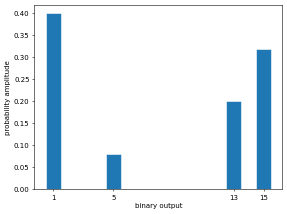

In [32]:
print(psi_measured.normalize_counts)
ax = psi_measured.normalize_counts.plot_state(dpi=50)

This is __not__ the same as taking the $L^2$-norm - the probability distrubtions do not align, as mentioned before.

 0.144+0.000j |0101> +
 0.360+0.000j |1101> +
 0.720+0.000j |0001> +
 0.576+0.000j |1111>


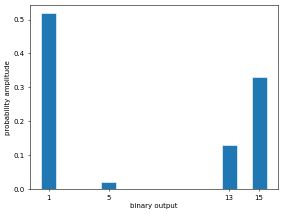

In [33]:
print(psi_measured.normalize)
# this shouldn't be used for normalizing quantum experiment data
# ... but functionality is still useful for normalizing states in the general setting
ax = psi_measured.normalize.plot_state(dpi=50)

## State sampling

It is also possible to randomly sample the state, just like a quantum experiment - this is particularly useful for the purposes of bootstrapping for statistical analysis of quantum experiments.

In [34]:
psi_measured_normalized = psi_measured.normalize_counts
psi_measured_normalized.sample_state(n_samples=50, return_normalized=True)

 0.316+0.000j |0101> +
 0.424+0.000j |1101> +
 0.648+0.000j |0001> +
 0.548+0.000j |1111>

Given enough samples, the original state will be reproduced exactly:

In [35]:
for n_samples in 2**np.arange(0, 30, 2):
    psi_sampled = psi_measured_normalized.sample_state(n_samples=n_samples, return_normalized=True)
    print(f'With n_samples={n_samples: <10}, <psi_sampled|psi_true> = {psi_sampled.dagger * psi_measured_normalized}')

With n_samples=1         , <psi_sampled|psi_true> = (0.565685424949238+0j)
With n_samples=4         , <psi_sampled|psi_true> = (0.799070478491457+0j)
With n_samples=16        , <psi_sampled|psi_true> = (0.9274672813718126+0j)
With n_samples=64        , <psi_sampled|psi_true> = (0.9998560311499007+0j)
With n_samples=256       , <psi_sampled|psi_true> = (0.9995171613100531+0j)
With n_samples=1024      , <psi_sampled|psi_true> = (0.9998474493807042+0j)
With n_samples=4096      , <psi_sampled|psi_true> = (0.9998306893940146+0j)
With n_samples=16384     , <psi_sampled|psi_true> = (0.9999579174180465+0j)
With n_samples=65536     , <psi_sampled|psi_true> = (0.9999857884510102+0j)
With n_samples=262144    , <psi_sampled|psi_true> = (0.9999988550667571+0j)
With n_samples=1048576   , <psi_sampled|psi_true> = (0.9999996869616397+0j)
With n_samples=4194304   , <psi_sampled|psi_true> = (0.9999999782683482+0j)
With n_samples=16777216  , <psi_sampled|psi_true> = (0.9999999574731135+0j)
With n_samples

## Plotting probabillity amplitudes of quantum state

In [36]:
%matplotlib inline
random_state = QuantumState.haar_random(3, vec_type='ket')
print(random_state)

 0.422-0.152j |000> +
-0.018-0.111j |001> +
 0.174+0.075j |010> +
-0.208+0.157j |011> +
-0.159-0.257j |100> +
-0.130+0.190j |101> +
-0.015+0.476j |110> +
-0.339+0.442j |111>


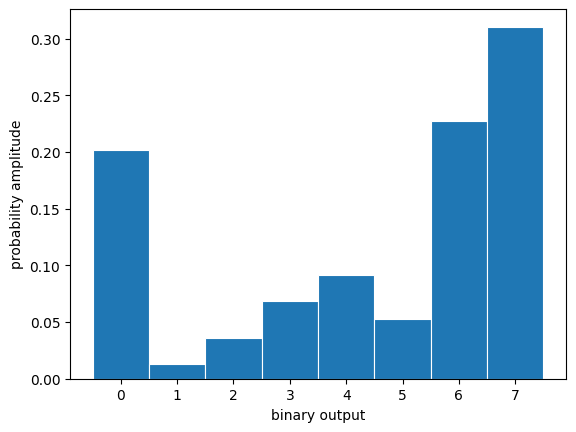

In [37]:
ax = random_state.plot_state(dpi=100)

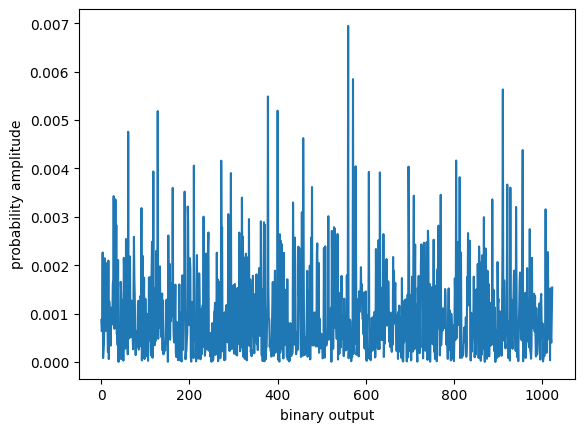

In [38]:
%matplotlib inline
random_large_state = QuantumState.haar_random(10, vec_type='ket')
ax2 = random_large_state.plot_state(logscale=False)

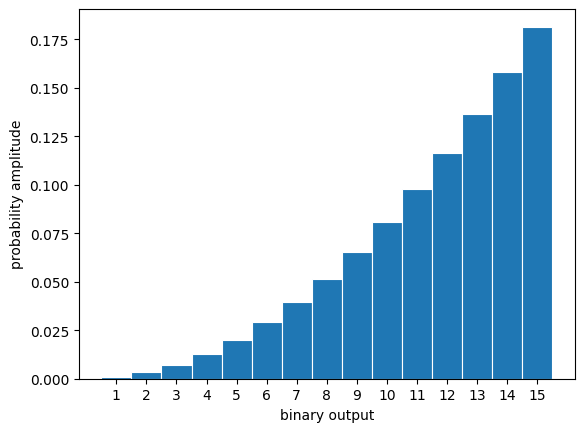

In [39]:
a = np.arange(2**4)
a = a/np.linalg.norm(a)
psi = QuantumState.from_array(a.reshape([-1,1]))
ax = psi.plot_state()

<Axes: xlabel='binary output', ylabel='probability amplitude'>

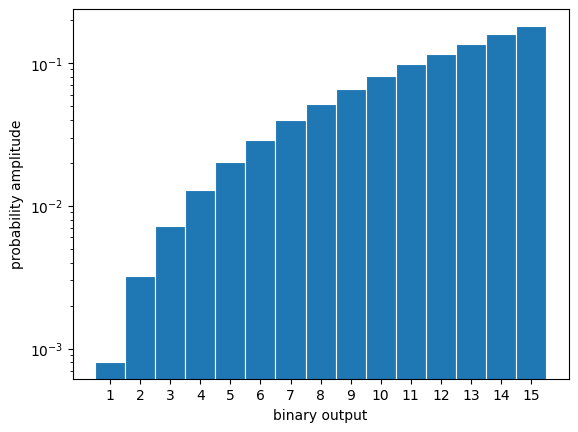

In [40]:
psi.plot_state(logscale=True)

<Axes: xlabel='binary output', ylabel='probability amplitude'>

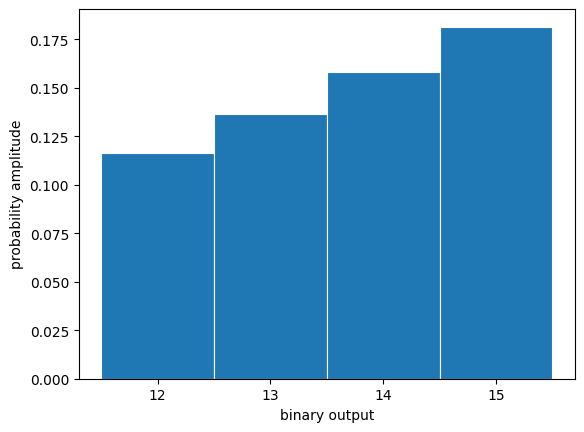

In [42]:
# plot all outputs above probability threshold:
psi.plot_state(probability_threshold=0.1)

## Final comments

Please note that `QuantumState`, while efficient, represents a full statevector simulation that is most efficient for states that can be efficiently described in the computational basis (efficiently meaning not too many basis states). For states that are not necessarily entangled, but require all computational basis states, e.g. the plus state on each qubit (act with Hadmard gate on each qubit). `QuantumState` will keep track a vector of size $2^{n}$. In such cases, alternative python libraries can describe these systems more efficiently if this becomes a bottleneck (e.g. qiskit circuit simulation tools). The goal of `QuantumState` is not to compete with these optimized libraries and has slightly different usage. In fact we find they can be used together, for example getting the statevector out of a qiskit statevector simulation and initalizing a `QuantumState` to perform analysis on.

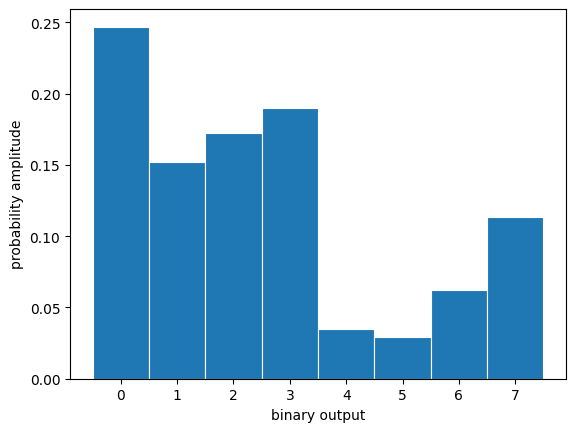

In [36]:
ax = random_state.plot_state(dpi=100)

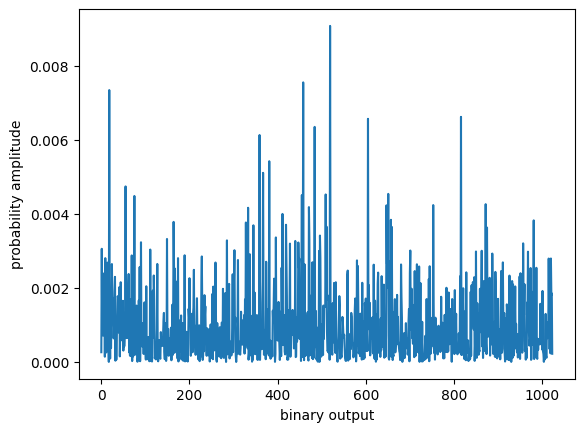

In [37]:
%matplotlib inline
random_large_state = QuantumState.haar_random(10, vec_type='ket')
ax2 = random_large_state.plot_state(logscale=False)

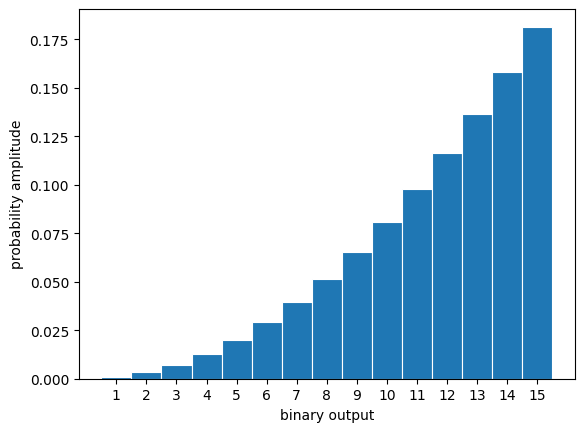

In [38]:
a = np.arange(2**4)
a = a/np.linalg.norm(a)
psi = QuantumState.from_array(a.reshape([-1,1]))
ax = psi.plot_state()

<Axes: xlabel='binary output', ylabel='probability amplitude'>

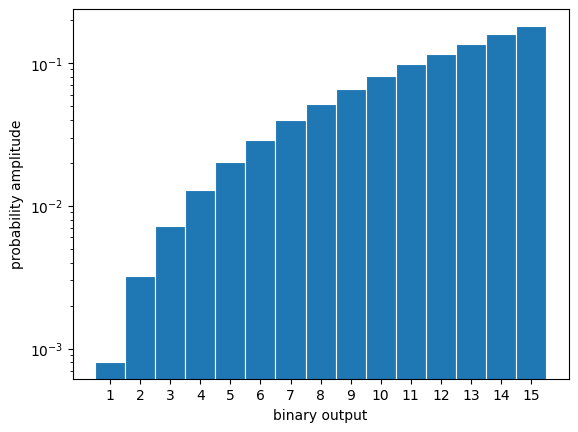

In [39]:
psi.plot_state(logscale=True)

<Axes: xlabel='binary output', ylabel='probability amplitude'>

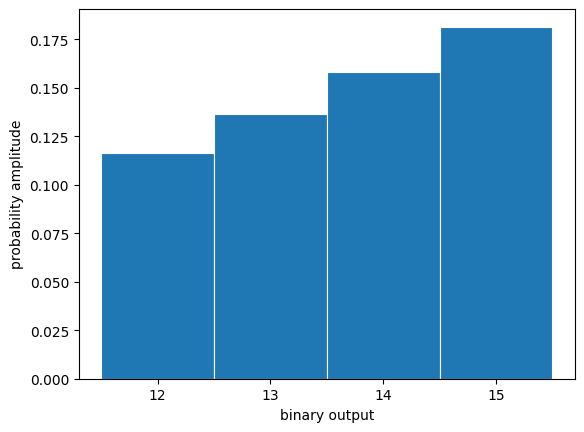

In [40]:
psi.plot_state(probability_threshold=0.1)

In [41]:
## Final comments

Please note that `QuantumState`, while efficient, represents a full statevector simulation that is most efficient for states that can be efficiently described in the computational basis (efficiently meaning not too many basis states). For states that are not necessarily entangled, but require all computational basis states, e.g. the plus state on each qubit (act with Hadmard gate on each qubit). `QuantumState` will keep track a vector of size $2^{n}$. In such cases, alternative python libraries can describe these systems more efficiently if this becomes a bottleneck (e.g. qiskit circuit simulation tools). The goal of `QuantumState` is not to compete with these optimized libraries and has slightly different usage. In fact we find they can be used together, for example getting the statevector out of a qiskit statevector simulation and initalizing a `QuantumState` to perform analysis on.

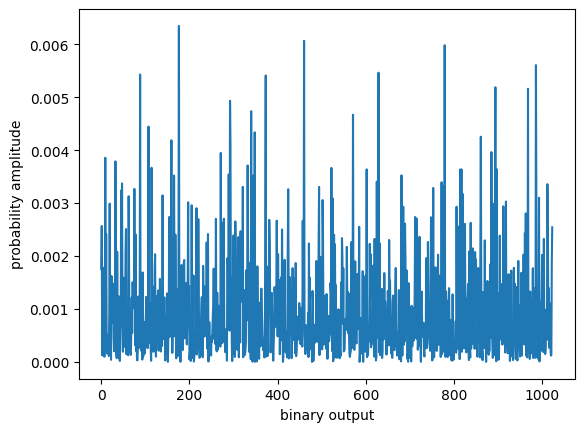

In [42]:
%matplotlib inline
random_large_state = QuantumState.haar_random(10, vec_type='ket')
ax2 = random_large_state.plot_state(logscale=False)

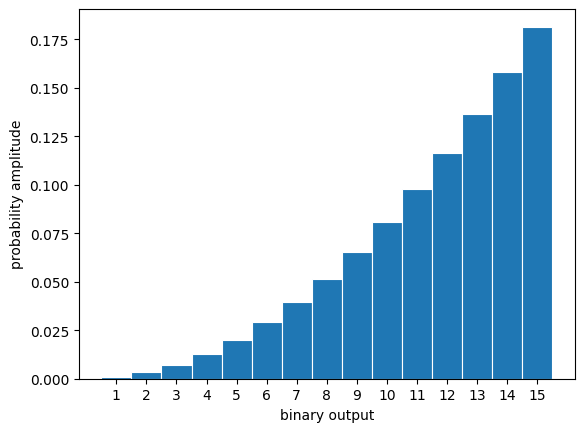

In [43]:
a = np.arange(2**4)
a = a/np.linalg.norm(a)
psi = QuantumState.from_array(a.reshape([-1,1]))
ax = psi.plot_state()

<Axes: xlabel='binary output', ylabel='probability amplitude'>

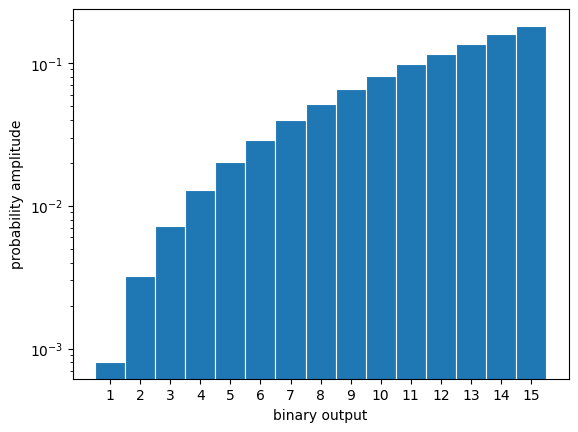

In [44]:
psi.plot_state(logscale=True)

<Axes: xlabel='binary output', ylabel='probability amplitude'>

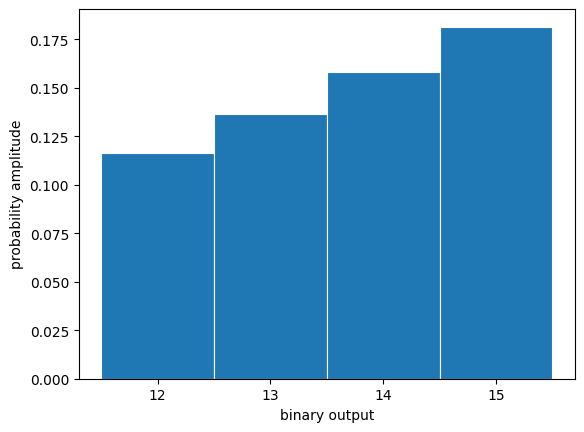

In [45]:
psi.plot_state(probability_threshold=0.1)

In [ ]:
## Final comments

Please note that `QuantumState`, while efficient, represents a full statevector simulation that is most efficient for states that can be efficiently described in the **computational basis** (efficiently meaning not too many basis states). For states that are not necessarily entangled, but require all computational basis states, e.g. the plus state on each qubit (act with Hadmard gate on each qubit). `QuantumState` will keep track a vector of size $2^{n}$. In such cases, alternative python libraries can describe these systems more efficiently if this becomes a bottleneck (e.g. qiskit circuit simulation tools). The goal of `QuantumState` is not to compete with these optimized libraries and has slightly different usage. In fact we find they can be used together, for example getting the statevector out of a qiskit statevector simulation and initalizing a `QuantumState` to perform analysis on.